# TMDb Movie Data Project
**By: Remon Ibrahim**




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction:

The Movie Database (TMDb) contains detailed information on thousands of films that have been released in recent decades. This database not only provides information about the movie's production (director, production firm, budget, etc. ), but it also has information about how spectators voted on the site.

In this research, I will examine a dataset provided by TMDb and investigate its data points in order to determine the attributes linked with very popular films. I'll clean the data first, then use Matplotlib to create multiple visualisations to find trends in the data.

## Tasks
* Wrangle the data of TMDB which is available on:  https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

* Explore the data and document the statistical report

#### Questions that will be answered:
*  What are the factors affecting profit ?
*  What is the highest year for releasing movies ?
*  which category is highly voted ?

### Data are represented through 21 columns:

* id
* imdb_id
* popularity
* budget
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_adj


In [1]:
# the used libraries will be imported firstly
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# we will read the file and load the data.
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assesing the data

In [6]:
#to check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# searching for the missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
 

In [9]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.


#### Cleaning process:

* 1stly we will check in the first step for any duplication 
* 2ndly After that duplication will be removed
* 3rdly I will make a confirmation test to make sure if the duplication has been removed or not
* 4thly Unecessary data column will be removed

In [10]:
#1stly
df.duplicated().sum()

1

In [11]:
#2ndly
df.drop_duplicates(inplace = True)

df.shape

(10865, 21)

In [12]:
#3rdly
df.duplicated().sum()

0

In [13]:
#4thly

df.drop(['imdb_id','homepage','budget','revenue','tagline','overview', 'keywords','cast', 'director', 'production_companies'], axis=1, inplace=True)

In [14]:
#renaming for some columns to be easy during usage
df.rename(columns = {'budget_adj':'prod_coast', 'revenue_adj':'profit'}, inplace=True)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
prod_coast        10865 non-null float64
profit            10865 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1018.6+ KB


,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,prod_coast,profit
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [15]:
#cells without data will be removed
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(10842, 11)

In [16]:
#dealing with the genres problem 
#we will creat a  data fram for genres
df['genres'] = df['genres'].str.split('|')
df.head(2)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,prod_coast,profit
0,135397,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [17]:
gen_rep = df.genres.apply(pd.Series)
gen_rep.head(3)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN


In [18]:
#the new data of genres after separation will be 
#included into our data table
gen_rep=df.merge(gen_rep, left_index=True, right_index = True)
gen_rep.head(3)



,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,prod_coast,profit,0,1,2,3,4
0,135397,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN
2,262500,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,NaN,NaN


In [19]:
#then the genres data will be sorted under a new name (category)
gen_rep=gen_rep.melt(id_vars=['id','popularity','original_title','runtime','genres','release_date','vote_count','vote_average','release_year','prod_coast','profit'],value_name="category")
gen_rep.head(3)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,prod_coast,profit,variable,category
0,135397,32.985763,Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0,Action
1,76341,28.419936,Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,0,Action
2,262500,13.112507,Insurgent,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,0,Adventure


In [20]:
'''changing the relese date format from string format into date format'''
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head(3)


0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

In [21]:
#then th un wanted columns of data will be neglected
#as usual using the below code
gen_rep.drop(['genres','variable'],axis=1,inplace=True)
gen_rep.head(3)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,prod_coast,profit,category
0,135397,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc009b36908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc00a0977b8>]], dtype=object)

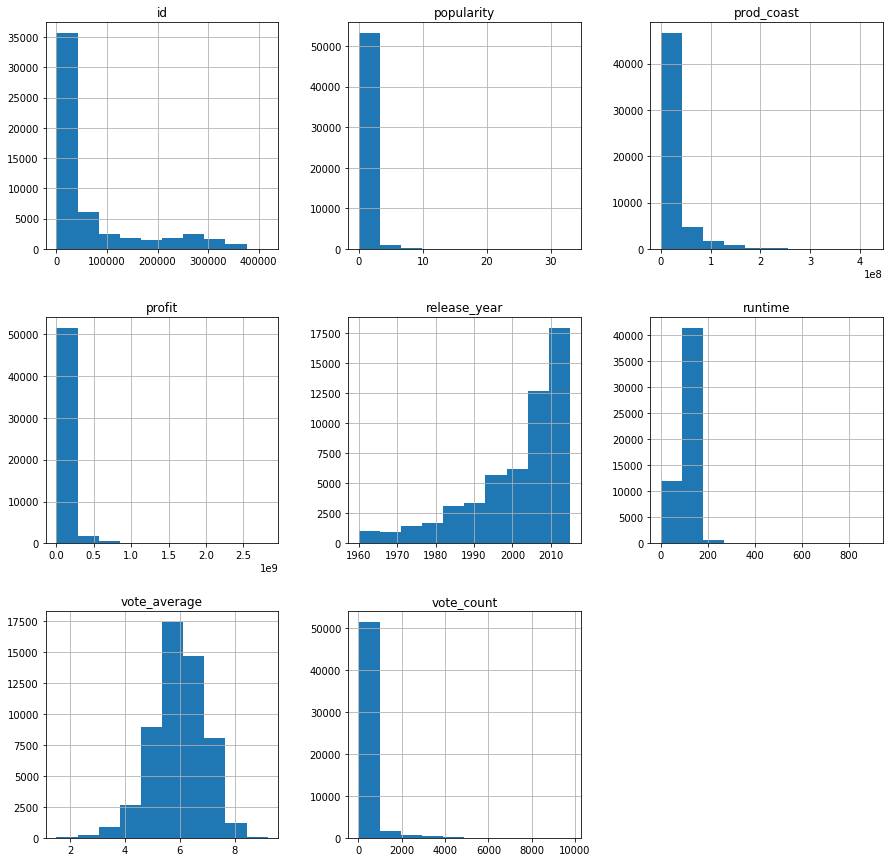

In [22]:
gen_rep.hist( figsize= (15,15))

1- 'release_year' histogram shows that the number of movies for each year has been increased exponentially. thus means (that film industry has been grown rapidly).

2- 'vote_average' is normally distributed.


3- The distributions for the other features are highly right-skewed .



<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What Are the factors affecting profit ? )

In [23]:
# to see what is the avilable themes for seaborn styles
plt.style.available

['seaborn',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-notebook',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn-white',
 'seaborn-ticks',
 'grayscale',
 'fast',
 '_classic_test',
 'fivethirtyeight',
 'Solarize_Light2',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn-darkgrid',
 'seaborn-muted',
 'seaborn-talk',
 'bmh',
 'classic']

In [24]:
#a function will be created to illustrate the distribution of (vote average, popularity and run time)
def my_box(feature):
    df.boxplot(feature, vert=False,showfliers=False)

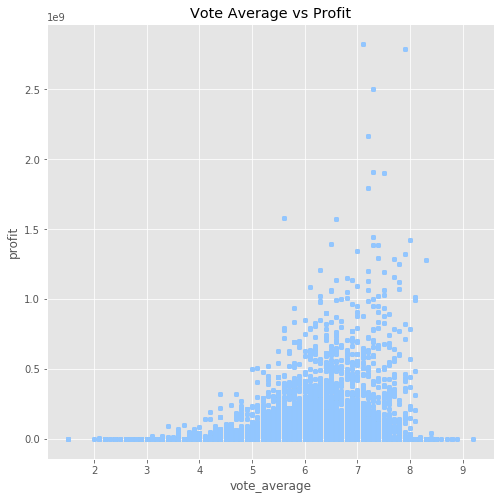

In [45]:
plt.style.use('seaborn-pastel')
gen_rep.plot(x='vote_average',y='profit',kind='scatter')
plt.title('Vote Average vs Profit')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

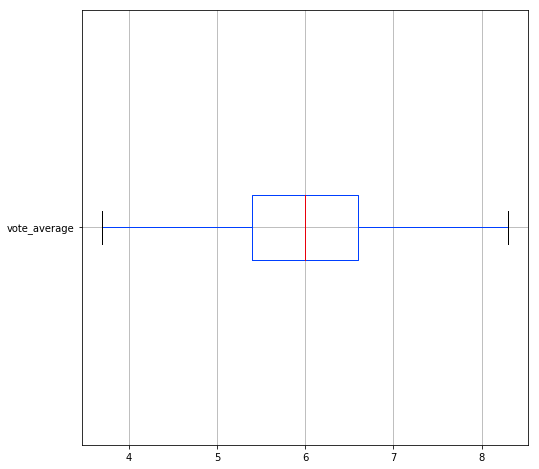

In [27]:
my_box('vote_average')

The scatter plot above followed by the box plot illustrates that 'vote_average'  evenly distributed and has no outliers.

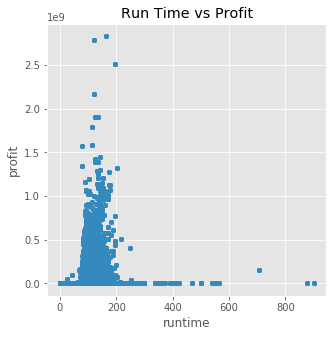

In [49]:
plt.style.use('ggplot')
gen_rep.plot(x='runtime',y='profit',kind='scatter')
plt.title('Run Time vs Profit')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

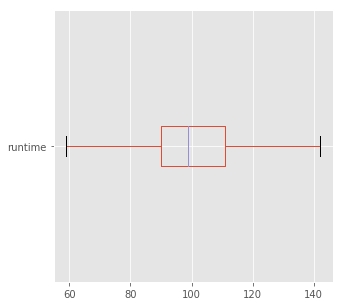

In [32]:
my_box('runtime')

The Run Time scatter plot above followed by the box plot illustrates that 'run time' is near normally distributed and has no outliers.

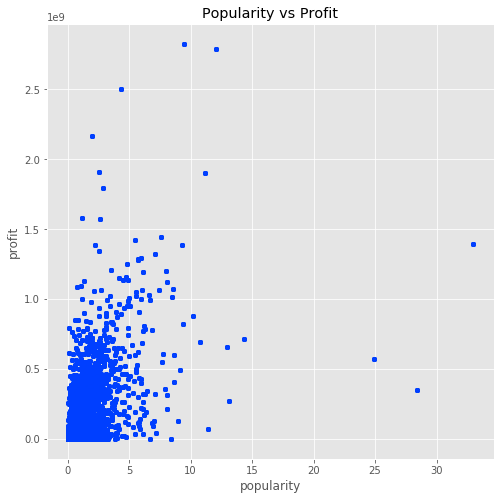

In [46]:
plt.style.use('seaborn-bright')
gen_rep.plot(x='popularity',y='profit',kind='scatter')
plt.title('Popularity vs Profit')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

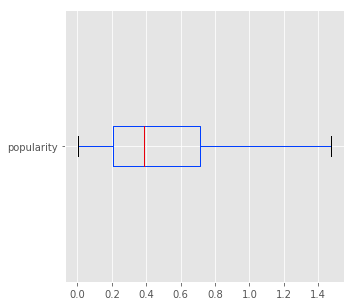

In [48]:
my_box('popularity')

we firstly want to confirm or neglect an assumption that  'vote_average', 'popularity' and 'runtime' represent the same thing. The scatter plot above illustrates that all the 3 factors are positively correlated. However, as shown by the box plots, 'vote_average' is the most normaly distributed and has no outliers, so it may has a strong correlation to the profit


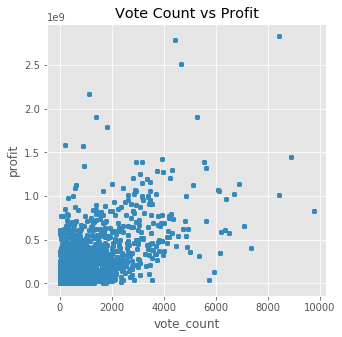

In [35]:
plt.style.use('ggplot')
gen_rep.plot(x='vote_count',y='profit',kind='scatter')
plt.title('Vote Count vs Profit')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

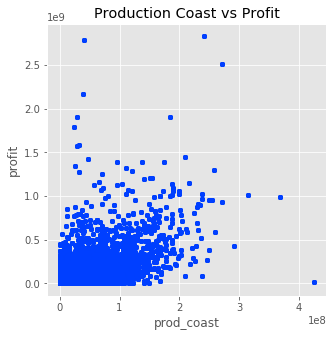

In [37]:
plt.style.use('seaborn-bright')
gen_rep.plot(x='prod_coast',y='profit',kind='scatter')
plt.title('Production Coast vs Profit')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [38]:
#correlation caloculations
df[['popularity', 'runtime','vote_count', 'vote_average','prod_coast']].corrwith(df['profit'])

popularity      0.608964
runtime         0.175615
vote_count      0.707865
vote_average    0.193836
prod_coast      0.646507
dtype: float64

Observations: The scatter plots show the connections between profit and other attributes.
All properties have a positive association with the level of profit. In addition, I'd like to point out that the bulk of films with strong box office potential have runtimes of less than 200 minutes. Movies with a length of more than 200 minutes were unable to generate significant money.


### Research Question 2  (What is  the highest year for releasing movies ? )

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


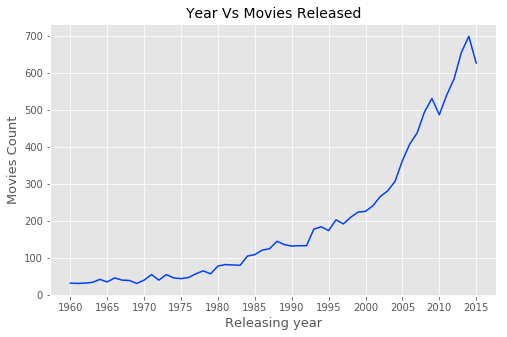

In [41]:
data=df.groupby('release_year').count()['id']

data.plot(xticks = np.arange(1960,2016,5))
plt.grid(True)
plt.title("Year Vs Movies Released",fontsize = 14)
plt.xlabel('Releasing year',fontsize = 13)
plt.ylabel('Movies Count',fontsize = 13)
plt.rcParams["figure.figsize"] = (8,5)

*Findings*: We may deduce, based on the plot and production, that the year 2014 has the highest number of film releases (700) 

### Research Question 3  (Which category is highly voted ? )


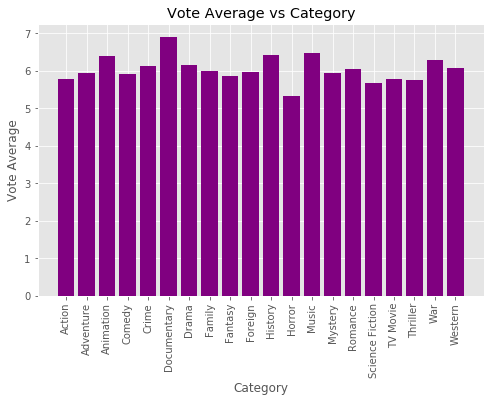

In [42]:
df_cat=gen_rep.groupby('category').mean()
df_cat=df_cat.sort_values('vote_average')
plt.bar(df_cat.index,df_cat['vote_average'], color = 'purple')
plt.xticks(rotation='90')
plt.title('Vote Average vs Category')
plt.ylabel('Vote Average')
plt.xlabel('Category')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

<a id='conclusions'></a>
## Conclusions


1-The following features of movies are positively associated to their large profit: popularity, running time, vote, and budget. 

2-The year 2014 had the most movie releases (700)

3-I used the new table I created when cleaning the data (gen rep) to create another table that provides the mean value of all columns aggregated by genre type in order to compare vote averages by genre.

The average vote mean for each genre was then shown on a bar chart.Horror, science fiction, and television movies have the lowest ratings, while documentary, history, and music have the highest ratings.

### Our limitations:

1- the values of revenue_adj and budg_adj are net defined by any currency so it may lead to misunderstanding
for our analysis as we dont know the country of each movie

2- the genres cell in our dataset is separated by ('|') which takes long time to adjust the genres for each movie

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255